In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

/Users/adashaw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 1.

In [3]:
data = pd.read_csv('AAPL_data.csv')
cl = data.close

In [5]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.        ],
       [0.00645746],
       [0.01170893],
       ...,
       [0.97662292],
       [0.98674571],
       [1.        ]])

In [6]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [7]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 1s 1ms/step - loss: 8.9577e-04 - val_loss: 0.0067
Epoch 2/300
1000/1000 [==============================] - 0s 401us/step - loss: 0.0072 - val_loss: 0.0125
Epoch 3/300
1000/1000 [==============================] - 0s 389us/step - loss: 0.0030 - val_loss: 0.0010
Epoch 4/300
1000/1000 [==============================] - 0s 394us/step - loss: 0.0010 - val_loss: 0.0020
Epoch 5/300
1000/1000 [==============================] - 0s 393us/step - loss: 0.0014 - val_loss: 0.0010
Epoch 6/300
1000/1000 [==============================] - 0s 396us/step - loss: 3.7684e-04 - val_loss: 8.7380e-04
Epoch 7/300
1000/1000 [==============================] - 0s 401us/step - loss: 4.4799e-04 - val_loss: 8.4189e-04
Epoch 8/300
1000/1000 [==============================] - 0s 396us/step - loss: 4.5832e-04 - val_loss: 8.3529e-04
Epoch 9/300
1000/1000 [==============================] - 0s 399us/step - loss: 5.1334e-

1000/1000 [==============================] - 0s 402us/step - loss: 2.9933e-04 - val_loss: 7.6931e-04
Epoch 75/300
1000/1000 [==============================] - 0s 392us/step - loss: 2.9415e-04 - val_loss: 7.3274e-04
Epoch 76/300
1000/1000 [==============================] - 0s 390us/step - loss: 2.8612e-04 - val_loss: 7.0165e-04
Epoch 77/300
1000/1000 [==============================] - 0s 399us/step - loss: 2.7643e-04 - val_loss: 6.7542e-04
Epoch 78/300
1000/1000 [==============================] - 0s 393us/step - loss: 2.6498e-04 - val_loss: 6.5505e-04
Epoch 79/300
1000/1000 [==============================] - 0s 394us/step - loss: 2.5272e-04 - val_loss: 6.4035e-04
Epoch 80/300
1000/1000 [==============================] - 0s 396us/step - loss: 2.4004e-04 - val_loss: 6.3183e-04
Epoch 81/300
1000/1000 [==============================] - 0s 396us/step - loss: 2.2771e-04 - val_loss: 6.2965e-04
Epoch 82/300
1000/1000 [==============================] - 0s 394us/step - loss: 2.1640e-04 - val_loss

1000/1000 [==============================] - 0s 413us/step - loss: 2.2885e-04 - val_loss: 4.6048e-04
Epoch 146/300
1000/1000 [==============================] - 0s 406us/step - loss: 2.2976e-04 - val_loss: 4.3174e-04
Epoch 147/300
1000/1000 [==============================] - 0s 403us/step - loss: 2.2716e-04 - val_loss: 4.0530e-04
Epoch 148/300
1000/1000 [==============================] - 0s 397us/step - loss: 2.2892e-04 - val_loss: 3.8463e-04
Epoch 149/300
1000/1000 [==============================] - 0s 394us/step - loss: 2.2909e-04 - val_loss: 3.8778e-04
Epoch 150/300
1000/1000 [==============================] - 0s 391us/step - loss: 2.0372e-04 - val_loss: 3.9521e-04
Epoch 151/300
1000/1000 [==============================] - 0s 394us/step - loss: 1.6925e-04 - val_loss: 3.8279e-04
Epoch 152/300
1000/1000 [==============================] - 0s 391us/step - loss: 1.6500e-04 - val_loss: 3.6875e-04
Epoch 153/300
1000/1000 [==============================] - 0s 397us/step - loss: 1.9629e-04 - 

1000/1000 [==============================] - 0s 398us/step - loss: 1.3766e-04 - val_loss: 3.6665e-04
Epoch 217/300
1000/1000 [==============================] - 0s 398us/step - loss: 1.3166e-04 - val_loss: 3.7716e-04
Epoch 218/300
1000/1000 [==============================] - 0s 394us/step - loss: 1.3061e-04 - val_loss: 3.8511e-04
Epoch 219/300
1000/1000 [==============================] - 0s 400us/step - loss: 1.3070e-04 - val_loss: 3.9340e-04
Epoch 220/300
1000/1000 [==============================] - 0s 406us/step - loss: 1.3014e-04 - val_loss: 4.0666e-04
Epoch 221/300
1000/1000 [==============================] - 0s 401us/step - loss: 1.2963e-04 - val_loss: 4.2498e-04
Epoch 222/300
1000/1000 [==============================] - 0s 404us/step - loss: 1.2979e-04 - val_loss: 4.4798e-04
Epoch 223/300
1000/1000 [==============================] - 0s 392us/step - loss: 1.3083e-04 - val_loss: 4.7561e-04
Epoch 224/300
1000/1000 [==============================] - 0s 401us/step - loss: 1.3278e-04 - 

1000/1000 [==============================] - 0s 401us/step - loss: 1.3285e-04 - val_loss: 6.8043e-04
Epoch 288/300
1000/1000 [==============================] - 0s 388us/step - loss: 1.3476e-04 - val_loss: 7.1120e-04
Epoch 289/300
1000/1000 [==============================] - 0s 394us/step - loss: 1.3668e-04 - val_loss: 7.4237e-04
Epoch 290/300
1000/1000 [==============================] - 0s 395us/step - loss: 1.3881e-04 - val_loss: 7.7058e-04
Epoch 291/300
1000/1000 [==============================] - 0s 388us/step - loss: 1.4127e-04 - val_loss: 7.9422e-04
Epoch 292/300
1000/1000 [==============================] - 0s 387us/step - loss: 1.4392e-04 - val_loss: 8.1374e-04
Epoch 293/300
1000/1000 [==============================] - 0s 400us/step - loss: 1.4633e-04 - val_loss: 8.3210e-04
Epoch 294/300
1000/1000 [==============================] - 0s 396us/step - loss: 1.4821e-04 - val_loss: 8.5143e-04
Epoch 295/300
1000/1000 [==============================] - 0s 388us/step - loss: 1.4975e-04 - 

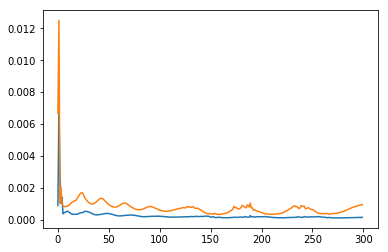

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
X_test[0]

array([[0.65371776],
       [0.65744716],
       [0.66418792],
       [0.65931151],
       [0.65880974],
       [0.67186084],
       [0.67652169]])

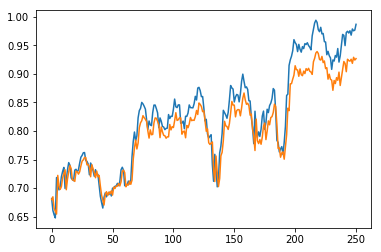

In [10]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [40]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[0.84997255]], actual:[[0.82668281]]


In [14]:
### add-in:
X_test

array([[[0.65371776],
        [0.65744716],
        [0.66418792],
        ...,
        [0.65880974],
        [0.67186084],
        [0.67652169]],

       [[0.65744716],
        [0.66418792],
        [0.65931151],
        ...,
        [0.67186084],
        [0.67652169],
        [0.68168504]],

       [[0.66418792],
        [0.65931151],
        [0.65880974],
        ...,
        [0.67652169],
        [0.68168504],
        [0.66088891]],

       ...,

       [[0.9494589 ],
        [0.97239903],
        [0.9745838 ],
        ...,
        [0.97545771],
        [0.967811  ],
        [0.97858922]],

       [[0.97239903],
        [0.9745838 ],
        [0.97152512],
        ...,
        [0.967811  ],
        [0.97858922],
        [0.97538488]],

       [[0.9745838 ],
        [0.97152512],
        [0.97545771],
        ...,
        [0.97858922],
        [0.97538488],
        [0.97662292]]])

In [41]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [ ]:
#result_df.plot(kind='line')

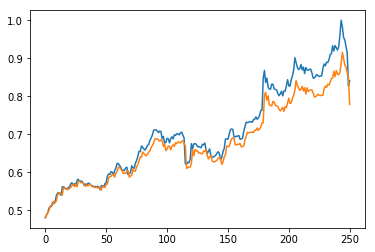

In [42]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))


In [11]:
X_test[249]

array([[0.97239903],
       [0.9745838 ],
       [0.97152512],
       [0.97545771],
       [0.967811  ],
       [0.97858922],
       [0.97538488]])

In [12]:
X_test[248]

array([[0.9494589 ],
       [0.97239903],
       [0.9745838 ],
       [0.97152512],
       [0.97545771],
       [0.967811  ],
       [0.97858922]])